<a href="https://colab.research.google.com/github/saikonda01/SMS_SPAM_DETECTION/blob/main/SMS_SPAM_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [3]:
df = pd.read_csv('spam.csv', encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

This will return a tuple where the first element is the number of rows and the second element is the number of columns in df









## DATA CLEANING

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


This is useful to understand the structure of your data and check for any missing values

In [6]:
# Droping UNwanted Columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace= True)


This operation will remove these columns in-place, meaning the original dataframe df will be modified without needing to assign the result to a new variable.



In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Running df.head() will display the first five rows of your dataframe. This is helpful for verifying that the unwanted columns have been successfully dropped.

If the columns 'Unnamed: 2', 'Unnamed: 3', and 'Unnamed: 4' have been removed correctly, you should only see the remaining columns in the output.

In [8]:
#Renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


By renaming the columns 'v1' to 'target' and 'v2' to 'text', you're making the dataframe more intuitive for analysis. This is helpful when working on tasks like text classification, where you need a clear distinction between the target variable and the text.

After running this, you should see the first five rows of the dataframe with the newly renamed columns: 'target' and 'text'. Let me know if you need further assistance with the next steps!









In [9]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['target']=LE.fit_transform(df['target'])

converting the categorical values in the target column into numerical form using LabelEncoder. This is typically done when you have categorical labels like "spam" and "ham," and you need to transform them into numerical values (e.g., 0 and 1) for machine learning models.

*   LabelEncoder() initializes the label encoder.

*  LE.fit_transform(df['target']) applies the label encoding to the target column, replacing the original values with their corresponding encoded values.

In [10]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
#Missing Values
df.isnull().sum()

,0
target,0
text,0


Running df.isnull().sum() will display the number of missing (null) values in each column of the dataframe. This helps in identifying whether there are any incomplete records that need handling before further analysis or modeling.

If you find missing values, you can decide how to deal with them, such as:

###Dropping rows with missing values: df.dropna(inplace=True)
###Filling missing values with a default value: df.fillna('default_value', inplace=True)


In [12]:
#Checking Duplicates
df.duplicated().sum()

403

Running df.duplicated().sum() will give you the total number of duplicate rows in your dataframe. This is important for ensuring the integrity of your data before training a model.



In [13]:
df=df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

##EDA

In [16]:
df['target'].value_counts()

,count
target,
0,4516
1,653


Running df['target'].value_counts() will provide a count of the unique values in the target column, which typically represents the distribution of classes (e.g., spam and ham) in dataset.



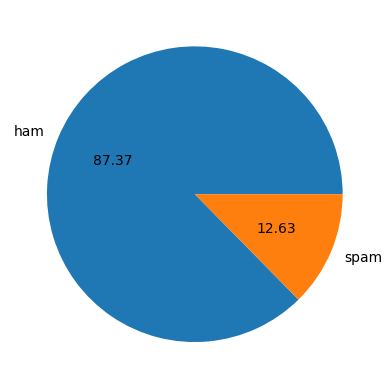

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

###df['target'].value_counts() counts the occurrences of each class in the target column.

###plt.pie(...) creates the pie chart:
###labels=['ham', 'spam'] specifies the labels for each slice of the pie.
###autopct="%0.2f" displays the percentage of each slice formatted to two decimal places.
###plt.show() displays the chart.


In [18]:
#Data is imbalanced

In [19]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [20]:
df['num_characters']=df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


###The line of code df['num_characters'] = df['text'].apply(len) creates a new column in your dataframe called num_characters, which contains the number of characters in each text entry of the text column. This can be useful for analyzing text length and its potential impact on classification.

In [21]:
#Num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
#ham messages
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

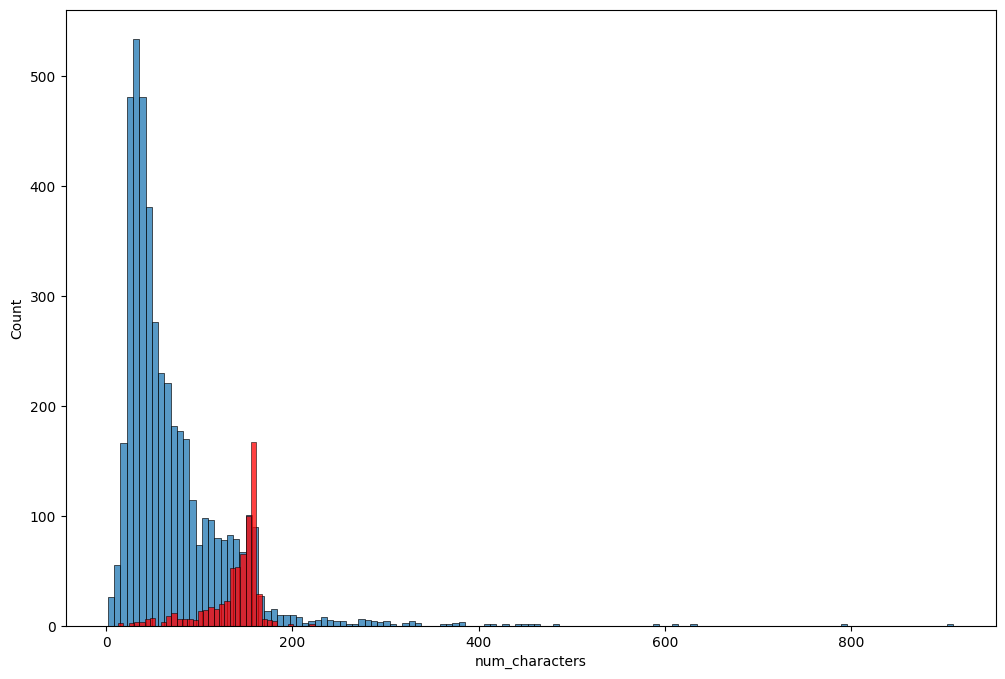

In [27]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0] ['num_characters'])
sns.histplot(df[df['target'] == 1] ['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

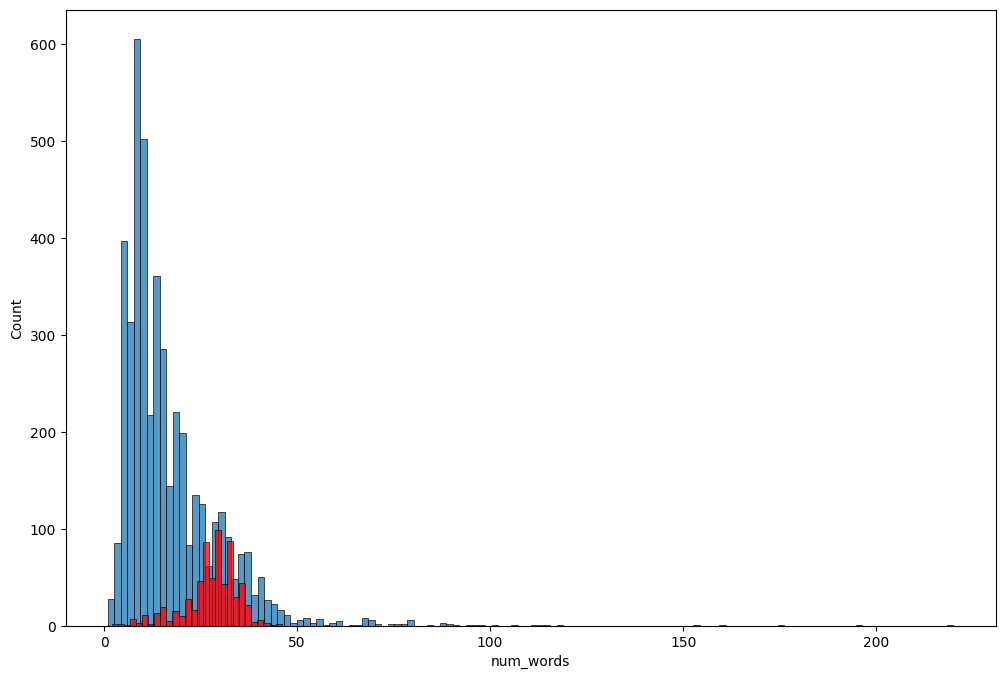

In [28]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0] ['num_words'])
sns.histplot(df[df['target'] == 1] ['num_words'],color='red')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

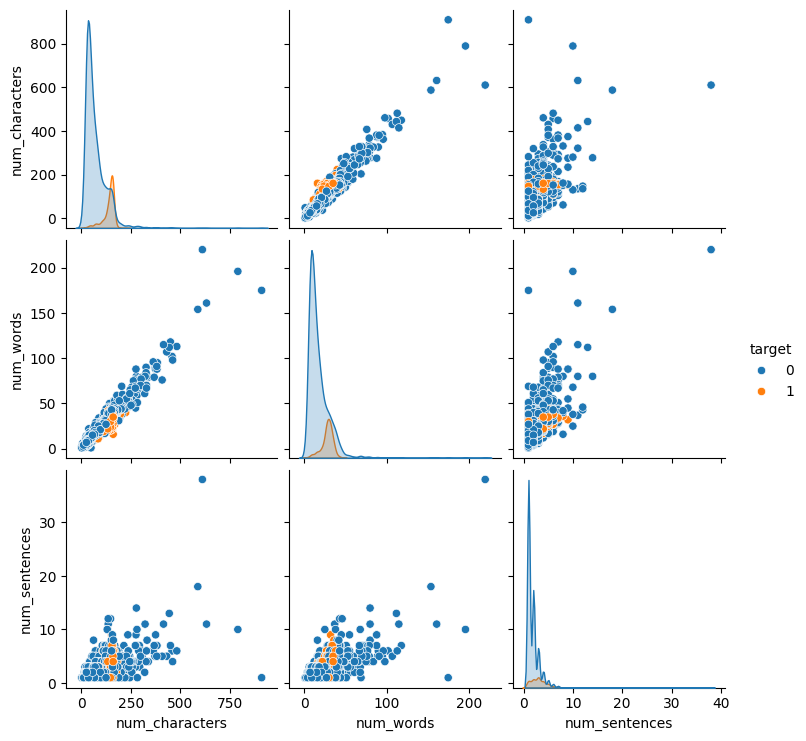

In [29]:
sns.pairplot(df, hue='target')
plt.show()


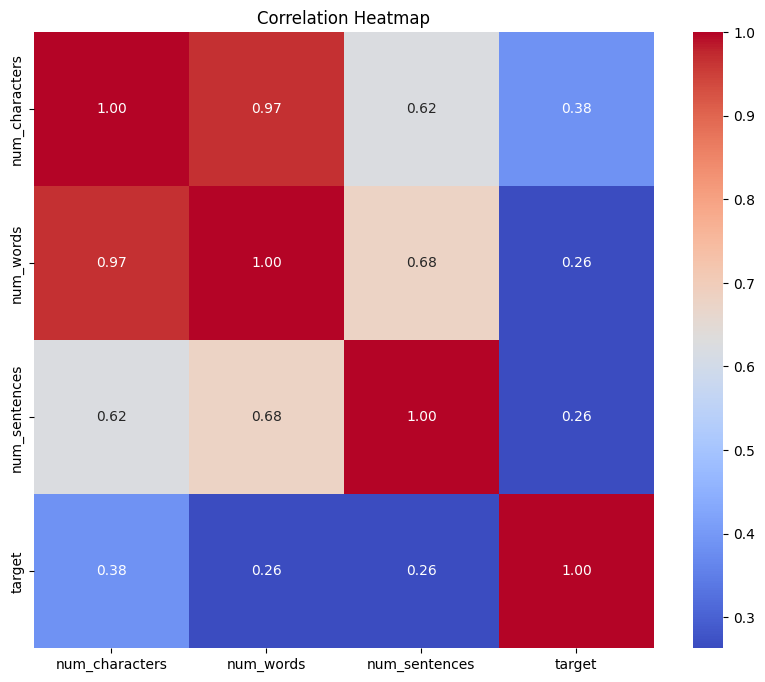

In [30]:
# Select only the numeric columns
numeric_df = df[['num_characters', 'num_words', 'num_sentences', 'target']]

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# Data Preprocessing



*   Lower Case
*   Tokenization

*   Removing special Characters
*   Removing stop words and punction

*   Stemming







In [31]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Make sure to download the stopwords if you haven't already
# nltk.download('stopwords')
# nltk.download('punkt')

ps = PorterStemmer()

def transform_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text
    text = nltk.word_tokenize(text)

    # Initialize an empty list to hold filtered words
    y = []

    # Filter out non-alphanumeric tokens
    for i in text:
        if i.isalnum():  # Check if the token is alphanumeric
            y.append(i)

    # Remove stopwords and punctuation
    y = [i for i in y if i not in stopwords.words('english') and i not in string.punctuation]

    # Apply stemming
    y = [ps.stem(i) for i in y]

    # Join the list back into a single string
    return " ".join(y)


In [33]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [34]:
df['cleaned_text'] = df['text'].apply(transform_text)


In [35]:
df.head()

,target,text,num_characters,num_words,num_sentences,cleaned_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


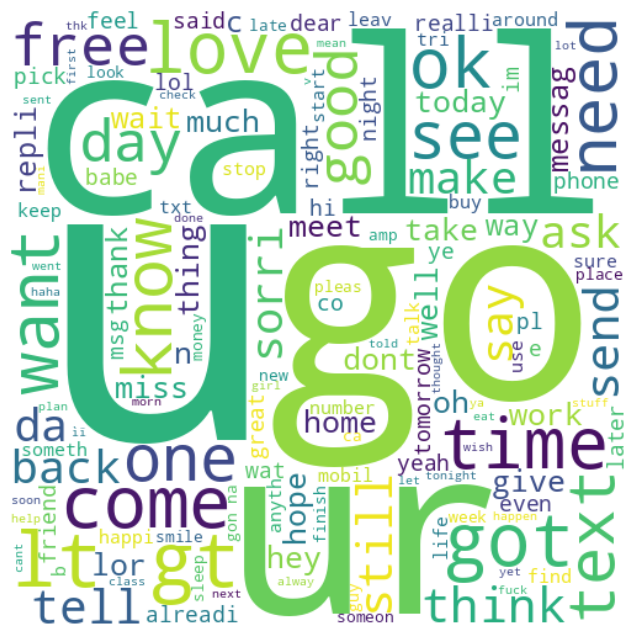

In [38]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combine all cleaned text into a single string
all_text = " ".join(df['cleaned_text'])

# Create the WordCloud object
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

# Generate the word cloud
wc.generate(all_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()


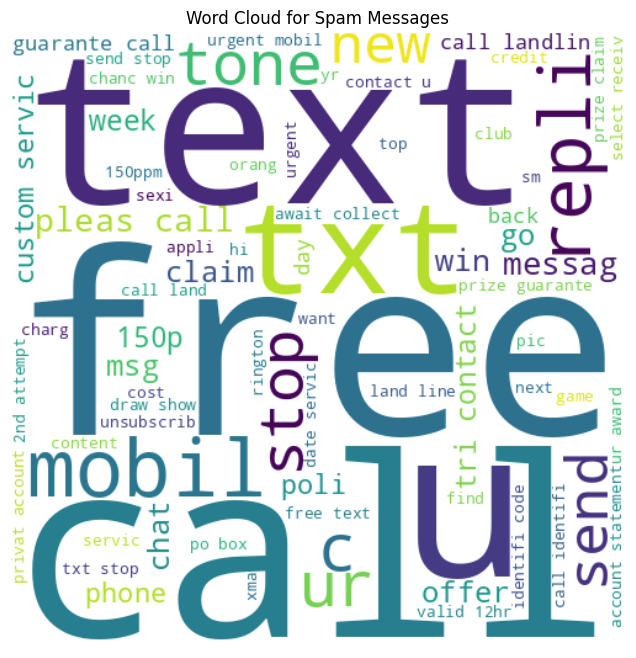

In [39]:
# Generate the word cloud for spam messages
spam_wc = wc.generate(df[df['target'] == 1]['cleaned_text'].str.cat(sep=" "))

# Display the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud for Spam Messages')
plt.show()


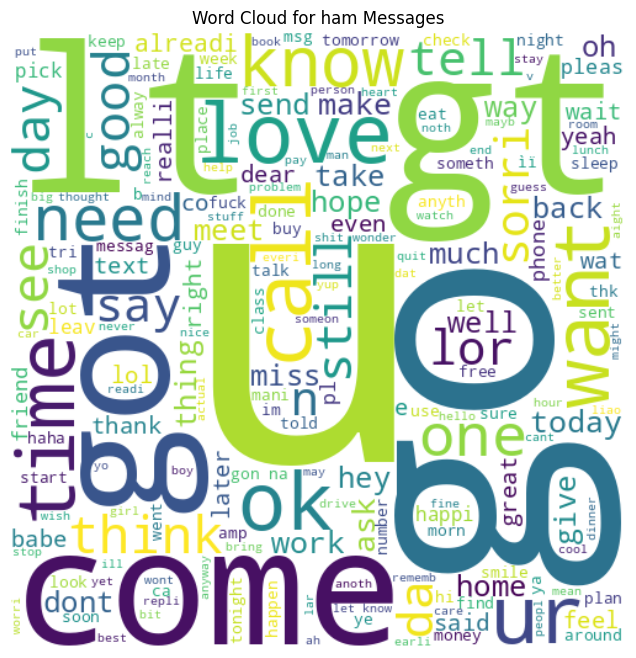

In [40]:
# Generate the word cloud for spam messages
ham_wc = wc.generate(df[df['target'] == 0]['cleaned_text'].str.cat(sep=" "))

# Display the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud for ham Messages')
plt.show()


In [41]:
spam_corpus = []
for msg in df[df['target'] == 1]['cleaned_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [42]:
len(spam_corpus)

9939

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

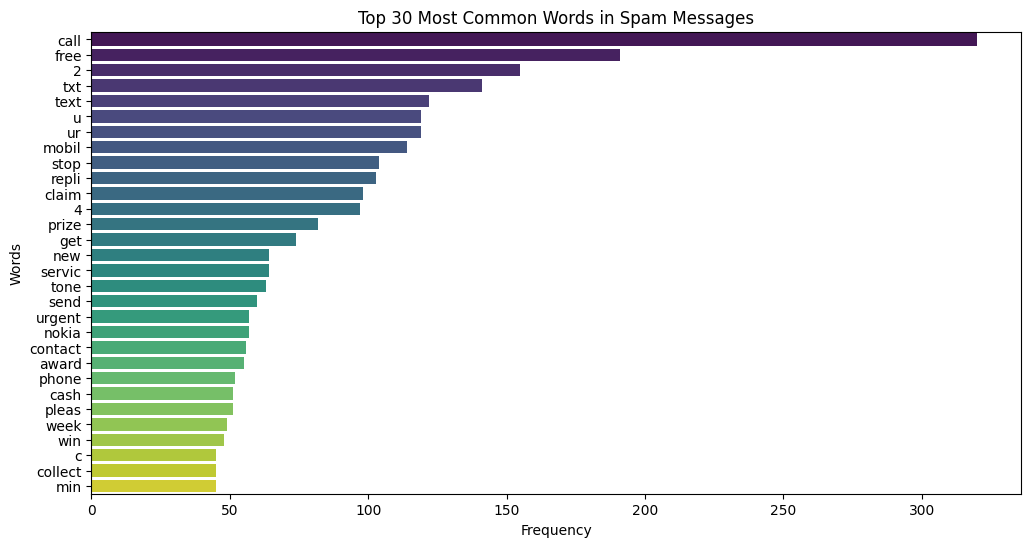

In [43]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'spam_corpus' is defined and contains the tokenized spam words
# Count the frequency of each word
spam_counter = Counter(spam_corpus)

# Get the most common 30 words and convert to a DataFrame
common_words = spam_counter.most_common(30)
spam_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Create a bar plot of the most common words
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word', data=spam_df, hue='Word', palette='viridis', legend=False)
plt.title('Top 30 Most Common Words in Spam Messages')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


In [44]:
ham_corpus =[]
for msg in df[df['target']==0]['cleaned_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [45]:
len(ham_corpus)

35404

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

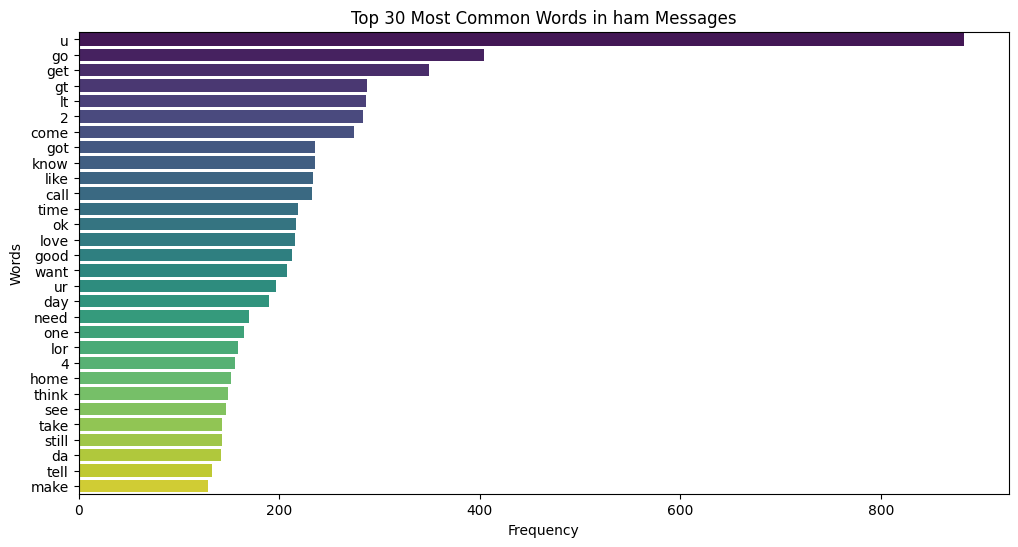

In [46]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'ham_corpus' is defined and contains the tokenized ham words
# Count the frequency of each word
ham_counter = Counter(ham_corpus)

# Get the most common 30 words and convert to a DataFrame
common_words = ham_counter.most_common(30)
ham_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Create a bar plot of the most common words
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word', data=ham_df, hue='Word', palette='viridis', legend=False)
plt.title('Top 30 Most Common Words in ham Messages')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


#Model Building

In [47]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [48]:
X= cv.fit_transform(df['cleaned_text']).toarray()

In [49]:
X.shape

(5169, 6708)

In [50]:
y = df['target'].values

In [51]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [54]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [55]:
GNB = GaussianNB()
MNB = MultinomialNB()
BNB = BernoulliNB()

In [56]:
GNB.fit(X_train,y_train)
y_pred1 =GNB.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [57]:
MNB.fit(X_train,y_train)
y_pred2 =MNB.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [58]:
BNB.fit(X_train,y_train)
y_pred3 =BNB.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [ ]:
#tfidf --> MNB


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [60]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


In [61]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [62]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision


In [63]:
train_classifier(svc,X_train,y_train,X_test,y_test)


(0.9264990328820116, 0.7421875)

In [64]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  SVC
Accuracy -  0.9264990328820116
Precision -  0.7421875
For  KN
Accuracy -  0.9061895551257253
Precision -  1.0
For  NB
Accuracy -  0.9642166344294004
Precision -  0.8344370860927153
For  DT
Accuracy -  0.9264990328820116
Precision -  0.9428571428571428
For  LR
Accuracy -  0.9709864603481625
Precision -  0.9736842105263158
For  RF
Accuracy -  0.971953578336557
Precision -  1.0


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9632495164410058
Precision -  0.9464285714285714
For  BgC
Accuracy -  0.9622823984526112
Precision -  0.9159663865546218
For  ETC
Accuracy -  0.97678916827853
Precision -  0.9913793103448276
For  GBDT
Accuracy -  0.9439071566731141
Precision -  0.9444444444444444
For  xgb
Accuracy -  0.9738878143133463
Precision -  0.9663865546218487


In [65]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [66]:
performance_df


,Algorithm,Accuracy,Precision
1,KN,0.906190,1.000000
5,RF,0.971954,1.000000
8,ETC,0.976789,0.991379
4,LR,0.970986,0.973684
10,xgb,0.973888,0.966387
6,AdaBoost,0.963250,0.946429
9,GBDT,0.943907,0.944444
3,DT,0.926499,0.942857
7,BgC,0.962282,0.915966
2,NB,0.964217,0.834437


In [67]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [68]:
performance_df1


,Algorithm,variable,value
0,KN,Accuracy,0.906190
1,RF,Accuracy,0.971954
2,ETC,Accuracy,0.976789
3,LR,Accuracy,0.970986
4,xgb,Accuracy,0.973888
5,AdaBoost,Accuracy,0.963250
6,GBDT,Accuracy,0.943907
7,DT,Accuracy,0.926499
8,BgC,Accuracy,0.962282
9,NB,Accuracy,0.964217


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


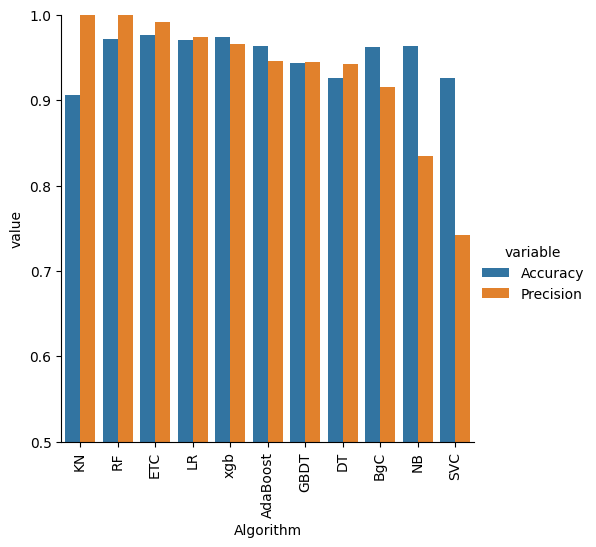

In [69]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()


In [70]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier


In [71]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [72]:
voting.fit(X_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [73]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


Accuracy 0.9816247582205029
Precision 0.976


In [74]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(MNB,open('model.pkl','wb'))